In [68]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
shapefile_path = r'E:\DATA\ARCdata\2021全国行政区划人口数据\地级市\WGS-84\2021\data_city_wgs84_2021.shp'
gdf = gpd.read_file(shapefile_path)
df_popu = gdf.drop(columns=['geometry', 'level', 'centerlon', 'centerlat', 'pcode'])

df_cityid = pd.read_csv("citydatachange_id_name_xy.csv")
df_change = pd.read_csv("data_change.csv", encoding='gbk')

In [50]:
df_popu['code'] = df_popu['code'].astype(str)
df_cityid['city_id_Amap'] = df_cityid['city_id_Amap'].astype(str)
df_merged = pd.merge(df_popu, df_cityid, left_on='code', right_on='city_id_Amap', how='inner')
df_merged = pd.merge(df_merged, df_change, left_on='id', right_on='city', how='inner')
df_merged = df_merged.drop_duplicates(subset='code', keep='first')

df_merged = df_merged.drop(columns=['name_x', 'pname', 'city_id_Amap', 'city', 'name'])

In [29]:
df_merged.to_csv('citydatachange02.csv', encoding='utf-8', index=False)

In [79]:
correlation = df_merged['value'].abs().corr(df_merged['2023_change_rate'].abs())
correlation

np.float64(-0.2037309674717857)

In [51]:
df_merged

,code,value,id,name_y,POINT_X,POINT_Y,2019,2020,2023,2020_change_rate,2023_change_rate,change
0,110000,20566876.0,1,北京市,116.412284,40.185543,0.507124,0.420837,0.393160,-0.086287,-0.027678,d-s
1,120000,13579169.0,2,天津市,117.334038,39.293426,0.441194,0.469675,0.499385,0.028481,0.029710,s-s
2,130100,10679074.0,3,石家庄市,114.439869,38.131270,0.420236,0.545541,0.457582,0.125305,-0.087959,u-d
3,130200,7926932.0,4,唐山市,118.335626,39.721554,0.653677,0.618483,0.545345,-0.035194,-0.073138,s-d
4,130300,3135246.0,5,秦皇岛市,119.185043,40.087971,0.442850,0.362111,0.563670,-0.080739,0.201559,d-u
...,...,...,...,...,...,...,...,...,...,...,...,...
369,659009,46947.0,367,昆玉市,79.294598,37.273427,0.000000,0.000000,0.000000,0.000000,0.000000,s-s
370,659010,69781.0,368,胡杨河市,84.788878,44.740325,0.000000,0.000000,0.000000,0.000000,0.000000,s-s
371,710000,23399534.0,369,台湾省,120.972272,23.750426,0.000000,0.000000,0.000000,0.000000,0.000000,s-s
372,810000,7266917.0,370,香港特别行政区,114.027576,22.417557,0.000000,0.000000,0.000000,0.000000,0.000000,s-s


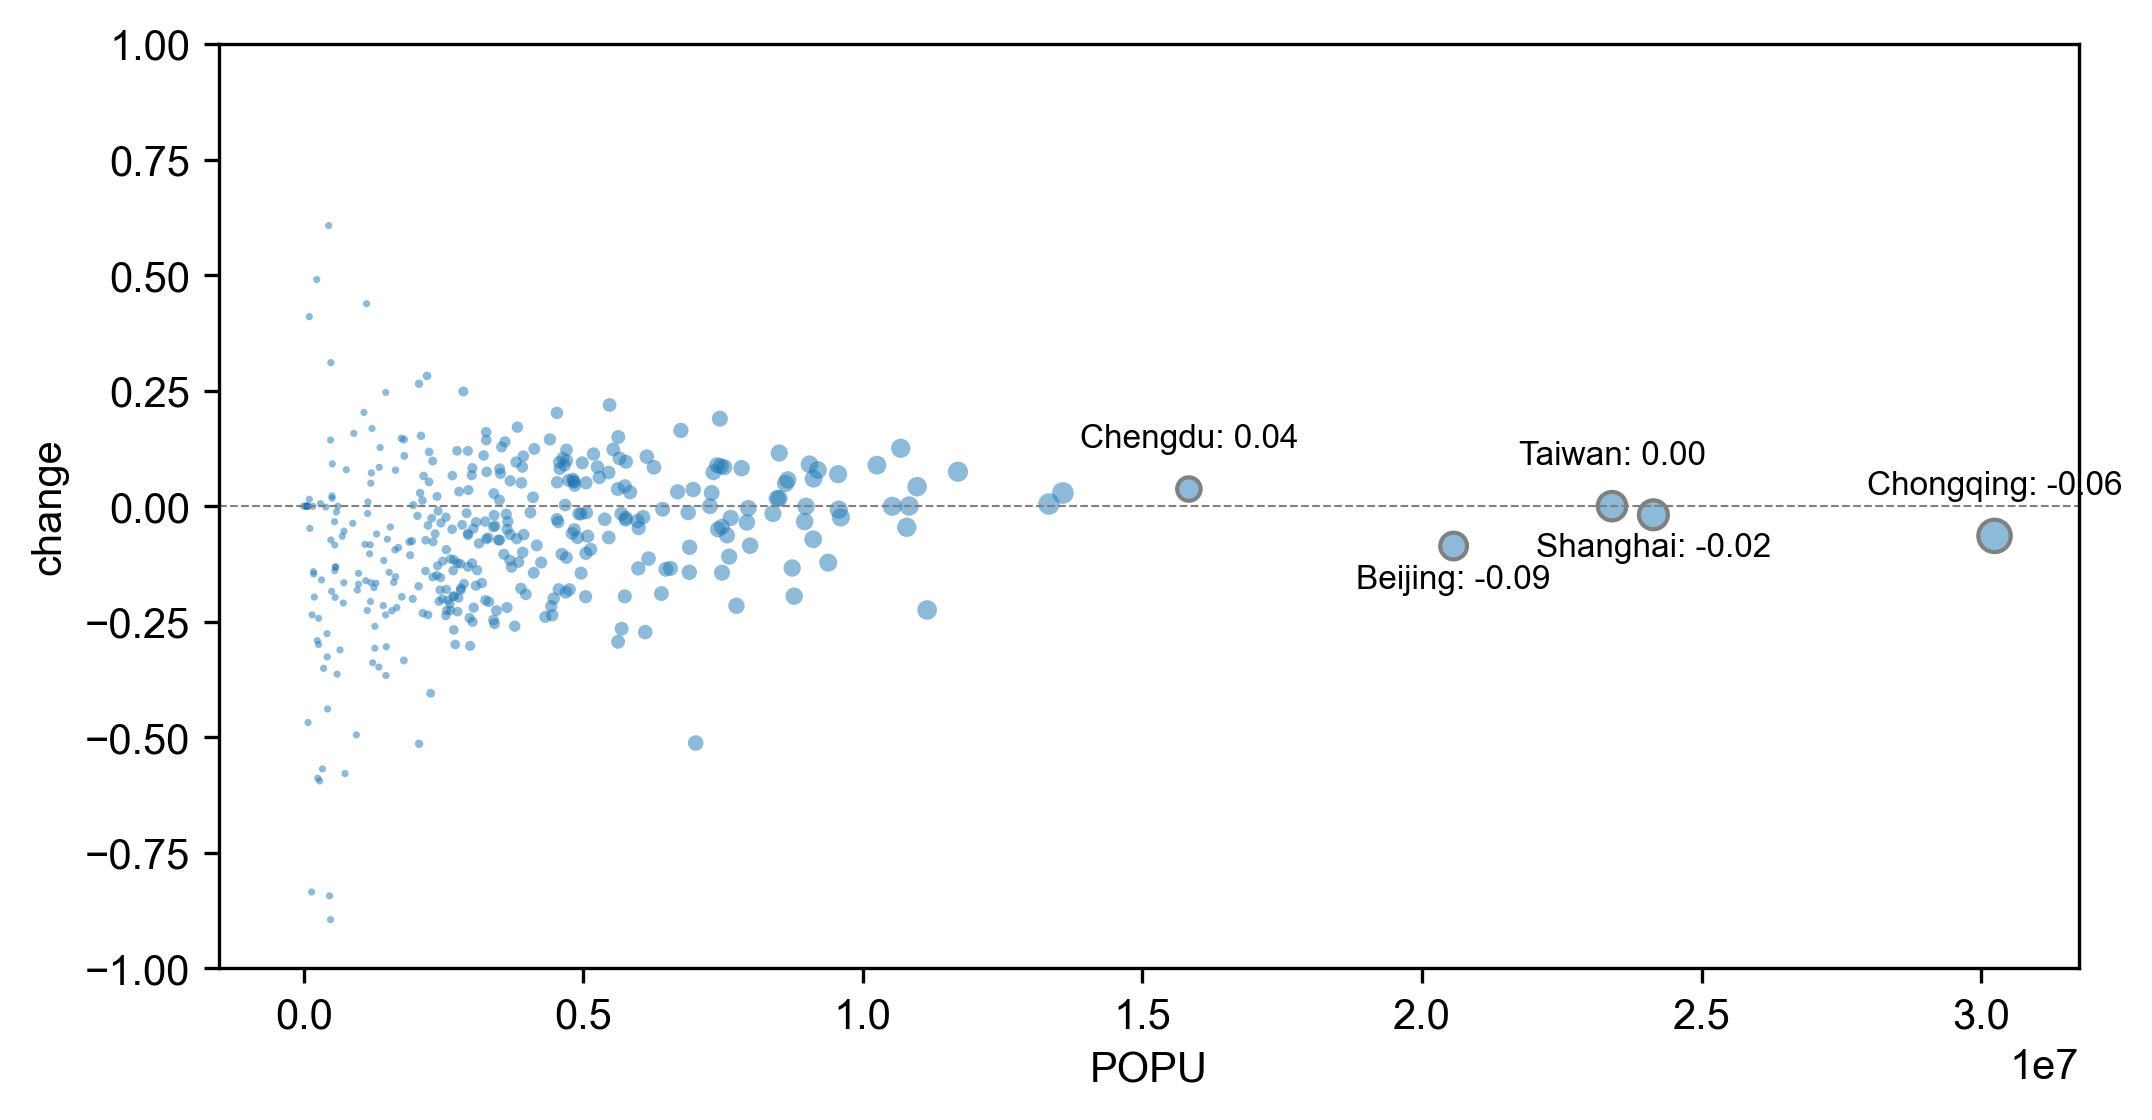

In [80]:
fig, ax1 = plt.subplots(figsize=(8, 4), dpi=300)
plt.rcParams['font.family'] = 'Arial'
ax1.scatter(df_merged['value'], df_merged['2020_change_rate'], s=np.clip(df_merged['value']/500000, 3, None), edgecolors='none', alpha=0.5)
top5_indices = df_merged['value'].nlargest(5).index
ax1.scatter(df_merged.loc[top5_indices, 'value'], df_merged.loc[top5_indices, '2020_change_rate'], 
            s=df_merged.loc[top5_indices, 'value']/500000, edgecolors='gray', facecolors='none', linewidths=1)

i = 0
citys = ['Chongqing', 'Shanghai', 'Taiwan', 'Beijing', 'Chengdu']
for idx in top5_indices:
    x_value = df_merged.loc[idx, 'value']
    y_value = df_merged.loc[idx, '2020_change_rate']
    city = citys[i]
    i += 1
    
    # 标注y值，位置可以稍微偏移以避免重叠
    ax1.annotate(f'{city}: {y_value:.2f}', 
                 (x_value, y_value), 
                 textcoords="offset points", 
                 xytext=(0,10 * (-1)**(i+1)), ha='center', fontsize=8)

ax1.set_xlabel('POPU')
ax1.set_ylabel('change')
ax1.set_ylim(-1, 1)
ax1.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)

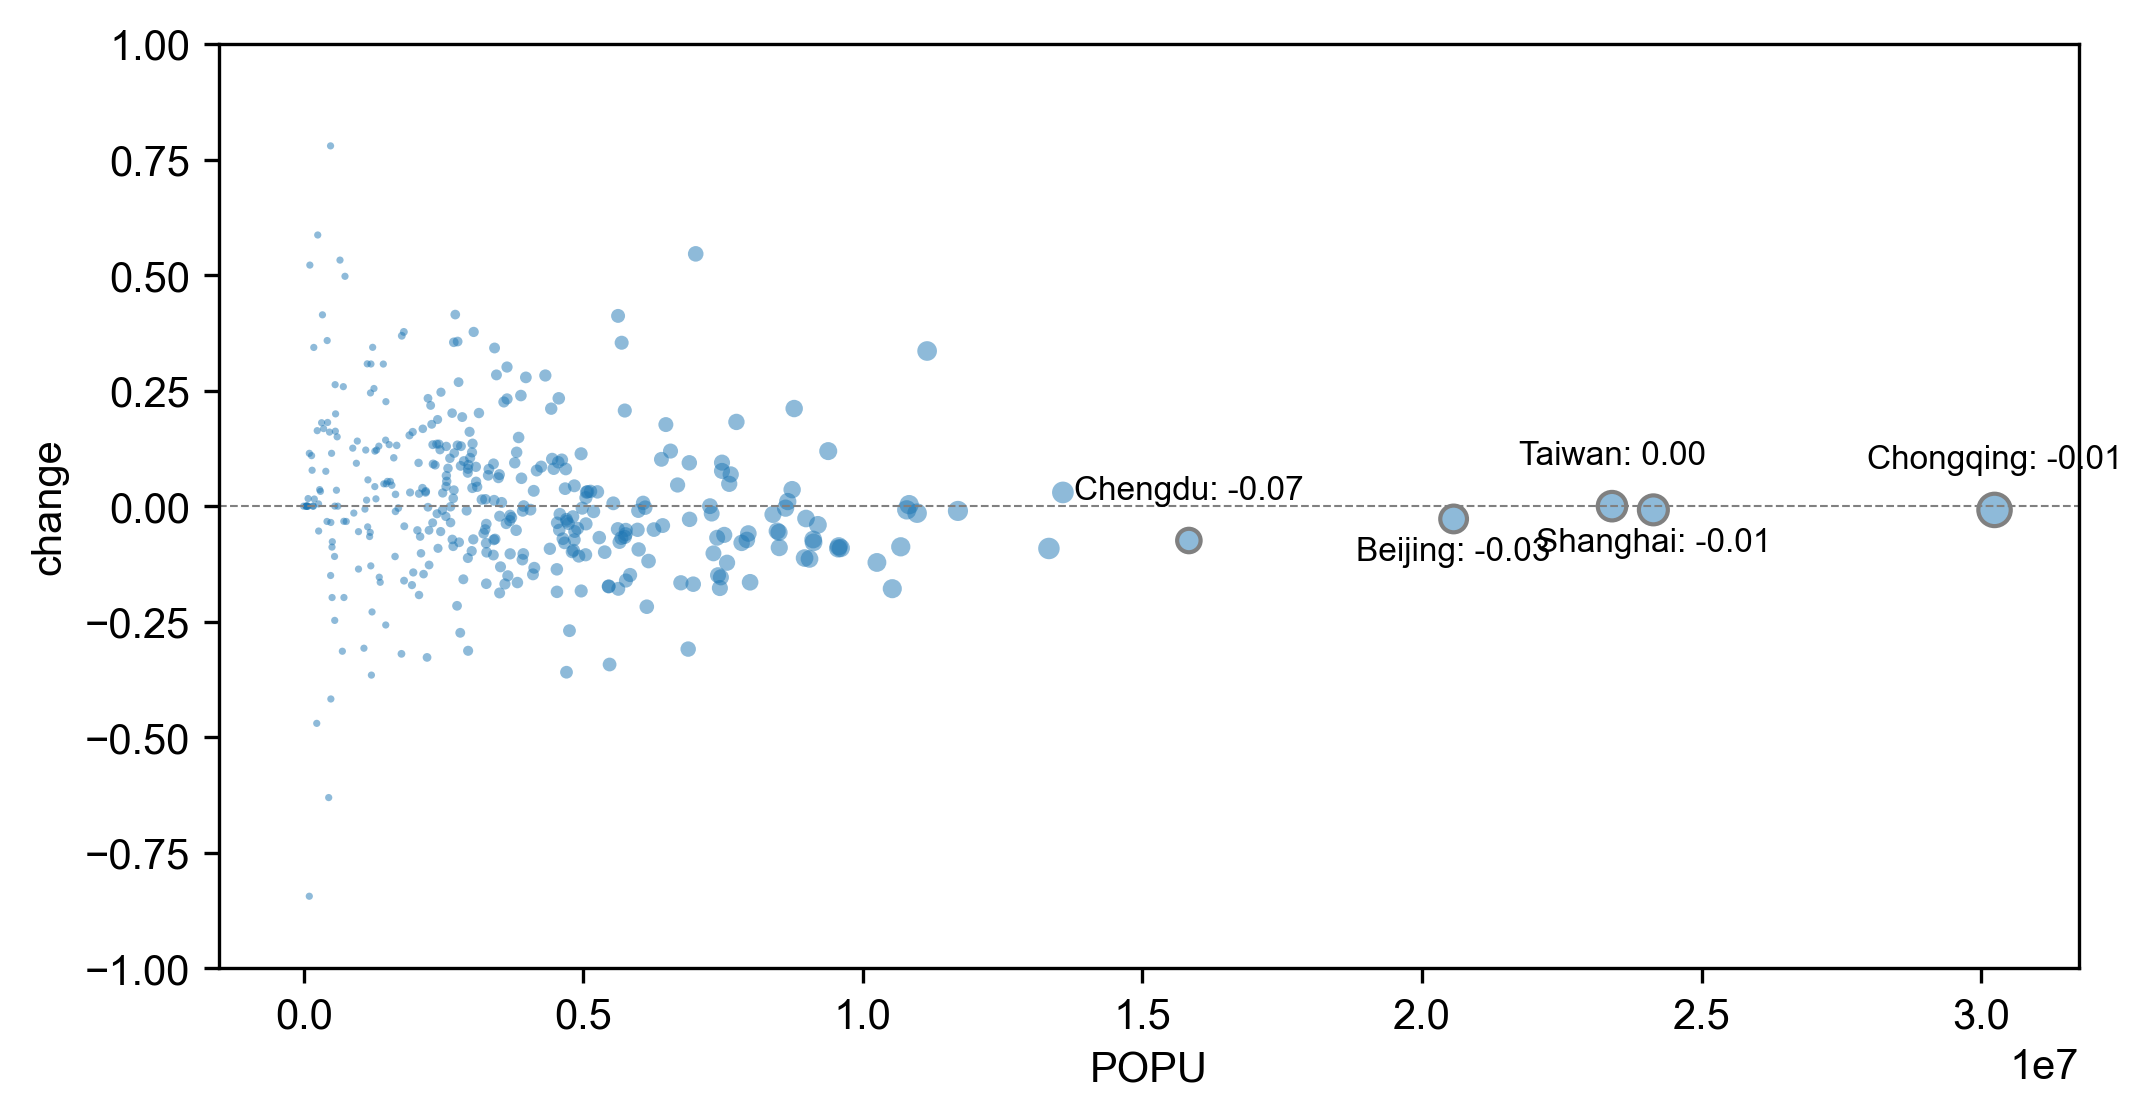

In [81]:
fig, ax1 = plt.subplots(figsize=(8, 4), dpi=300)
plt.rcParams['font.family'] = 'Arial'
ax1.scatter(df_merged['value'], df_merged['2023_change_rate'], s=np.clip(df_merged['value']/500000, 3, None), edgecolors='none', alpha=0.5)
top5_indices = df_merged['value'].nlargest(5).index
ax1.scatter(df_merged.loc[top5_indices, 'value'], df_merged.loc[top5_indices, '2023_change_rate'], 
            s=df_merged.loc[top5_indices, 'value']/500000, edgecolors='gray', facecolors='none', linewidths=1)

i = 0
citys = ['Chongqing', 'Shanghai', 'Taiwan', 'Beijing', 'Chengdu']
for idx in top5_indices:
    x_value = df_merged.loc[idx, 'value']
    y_value = df_merged.loc[idx, '2023_change_rate']
    city = citys[i]
    i += 1
    
    # 标注y值，位置可以稍微偏移以避免重叠
    ax1.annotate(f'{city}: {y_value:.2f}', 
                 (x_value, y_value), 
                 textcoords="offset points", 
                 xytext=(0,10 * (-1)**(i+1)), ha='center', fontsize=8)

ax1.set_xlabel('POPU')
ax1.set_ylabel('change')
ax1.set_ylim(-1, 1)
ax1.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)